In [1]:
import pandas as pd

In [7]:
def nb_labyrinthes(n, m):
    """
    Calcule le nombre de vrais labyrinthes sur une grille n x m
    (Le nombre de vrais labyrinthes sur un grille est équivalent au nombre d'arbre couvrant
    dans un graphe, car les labyrinthes sont les arbres couvrants dans un graphe).
    
    Selon le théorême de Kirchoff en théorie des graphes, le nombre d'arbres couvrants dans un graphe
    est égal à n'importe quel cofacteur de la matrice laplacienne du graphe.
    """
    # On crée un graphe de dimension n * m
    G = graphs.GridGraph([n, m])

    # On en extrait sa matrice Laplacienne L où l(i,j) = deg[s(i)] si i = j
    #                                             = -1 si i != j and s(i) est adjacent à s(j)
    #                                             = 0 sinon
    # Où l(i,j) désigne le coefficient ligne i colonne j de la matrice et s(i)/s(j)
    # représente le i-ème/j-ème sommet du graphe G avec i appartenant à [1, n]
    L = G.laplacian_matrix()

    # On supprime la première ligne et colonne de la matrice
    L_minor = L.delete_rows([0]).delete_columns([0])
    
    # On calcule son déterminant = un cofacteur de la matrice laplacienne
    return L_minor.determinant()

In [8]:
nb_labyrinthes(2, 3)

15

In [9]:
nb = pd.DataFrame([nb_labyrinthes(n,m) for n in range(2, 6) for m in range(2, 6)])
nb

,0
0,4
1,15
2,56
3,209
4,15
5,192
6,2415
7,30305
8,56
9,2415


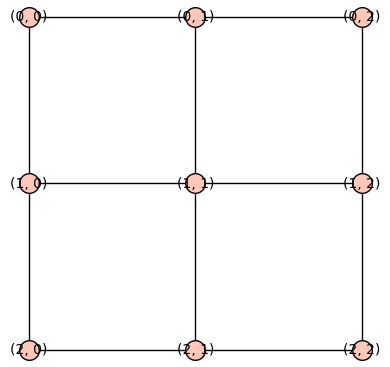

[ 2 -1  0 -1  0  0  0  0  0]
[-1  3 -1  0 -1  0  0  0  0]
[ 0 -1  2  0  0 -1  0  0  0]
[-1  0  0  3 -1  0 -1  0  0]
[ 0 -1  0 -1  4 -1  0 -1  0]
[ 0  0 -1  0 -1  3  0  0 -1]
[ 0  0  0 -1  0  0  2 -1  0]
[ 0  0  0  0 -1  0 -1  3 -1]
[ 0  0  0  0  0 -1  0 -1  2]

In [10]:
G = graphs.GridGraph([3, 3])
G.show()
L = G.laplacian_matrix()
show(L)

In [19]:
df = pd.DataFrame({n : [nb_labyrinthes(n, m) for m in range(2, 16)] for n in range(2, 16)}, index = range(2, 16))
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2,4,15,56,209,780,2911,10864,40545,151316,564719,2107560,7865521,29354524,109552575
3,15,192,2415,30305,380160,4768673,59817135,750331584,9411975375,118061508289,1480934568960,18576479568193,233018797965135,2922930580320960
4,56,2415,100352,4140081,170537640,7022359583,289143013376,11905151192865,490179860527896,20182531537581071,830989874753525760,34214941811800329425,1408756312731277540744,58003732850974438010175
5,209,30305,4140081,557568000,74795194705,10021992194369,1342421467113969,179796299139278305,24080189412483072000,3225041354570508955681,431926215138756947267505,57847355494807961811035009,7747424602888405489208931601,1037602902862756514154816000000
6,780,380160,170537640,74795194705,32565539635200,14143261515284447,6136973985625588560,2662079368040434932480,1154617875754582889149500,500769437567956298239402223,217185579535490113365186969600,94193702839904633186530210863025,40851869157273984726590135085017940,17717469746416280095776019395706656000
7,2911,4768673,7022359583,10021992194369,14143261515284447,19872369301840986112,27873182693625548898079,39067130344394503972142977,54740416599810921320592441119,76692291658239649098972455530913,107441842254735898225957962027174559,150517199699838971875005120330439121217,210860422397100784567572728149075575177216,295394542455170446994290978914210208936856257
8,10864,59817135,289143013376,1342421467113969,6136973985625588560,27873182693625548898079,126231322912498539682594816,570929651486775190858844600865,2580716459066338161324165906475056,11662182187505395757590783332919031887,52694472151073080753239361610655330385920,238081319270032935235024240492851444203150225,1075657693441243366371668656520857225923183796496,4859790675828885414626615906314167751697566253...
9,40545,750331584,11905151192865,179796299139278305,2662079368040434932480,39067130344394503972142977,570929651486775190858844600865,8326627661691818545121844900397056,121316352059447360262303173959408358625,1766658737971934774798769007686932254154689,25720403635745268744109927845749457198620666880,3744111689946441235591580790897749107121583337...,5449952759879032159966340849624108901518552356...,7932738237464154010560668382823500327136699615...
10,151316,9411975375,490179860527896,24080189412483072000,1154617875754582889149500,54740416599810921320592441119,2580716459066338161324165906475056,121316352059447360262303173959408358625,5694319004079097795957215725765328371712000,267064764913426007170515381730951273169137952879,1252005580892355525896169487805589294731447287...,5868093740683849644986096289006634386530204439...,2750013987072391432470643071783092618939380033...,1288678013687428991827849991446273724472031075...
11,564719,118061508289,20182531537581071,3225041354570508955681,500769437567956298239402223,76692291658239649098972455530913,11662182187505395757590783332919031887,1766658737971934774798769007686932254154689,267064764913426007170515381730951273169137952879,4032502172140411851327685951349767924918362359...,6084835104255476994139097448620689520036494184...,9178317497822574738581681768984139896983104032...,1384162156758591374556111981926270165920734906...,2087179158484130295899534969601864187277268881...


In [17]:
%%time
nb_labyrinthes(10, 10)

CPU times: user 16.1 ms, sys: 4 μs, total: 16.1 ms
Wall time: 15.3 ms


5694319004079097795957215725765328371712000

In [18]:
%%time
nb_labyrinthes(25, 25)

CPU times: user 1.5 s, sys: 4.12 ms, total: 1.5 s
Wall time: 1.65 s


959907718885045419579095518477469669155732971497473827895648389913947967048867472994424083469766217414124660493028202975647650144854739390378006884593585908461329762131095958505775471053807379591994748498986537126149610340091917073973016667838550527871605363160394628742512640000000000000000000000